In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

# Exploratory Data Analysis

In [3]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [38]:
df[df['Revenue'] == True]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,TotalPages,TotalTime
65,3,87.833333,0,0.00,27,798.333333,0.000000,0.012644,22.916036,0.8,0,2,2,3,1,0,False,1,30,886.166667
76,10,1005.666667,0,0.00,36,2111.341667,0.004348,0.014493,11.439412,0.0,0,2,6,1,2,0,False,1,46,3117.008334
101,4,61.000000,0,0.00,19,607.000000,0.000000,0.026984,17.535959,1.0,0,1,1,7,4,0,True,1,23,668.000000
188,9,111.500000,1,48.50,49,1868.819697,0.000000,0.020709,1.706015,0.0,1,2,2,7,2,0,False,1,59,2028.819697
196,2,56.000000,1,144.00,67,2563.783333,0.000000,0.005797,19.342650,0.0,1,2,2,4,2,1,False,1,70,2763.783333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,6,133.466667,0,0.00,44,2664.445833,0.002041,0.010884,97.860836,0.0,8,2,2,1,3,0,True,1,50,2797.912500
12276,7,139.575000,0,0.00,30,986.500000,0.000000,0.011429,36.392861,0.0,9,2,10,1,2,1,False,1,37,1126.075000
12311,1,0.000000,2,211.25,144,4627.489571,0.001361,0.020664,0.000000,0.0,8,2,2,1,2,0,False,1,147,4838.739571
12312,7,150.357143,1,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,8,2,5,1,2,0,True,1,229,11590.358383


In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
df_no_buy = df[df['Revenue'] == False]
df_buy = df[df['Revenue'] == True]

data = [df_no_buy, df_buy]

#Looking at number of visits made total
print(sum(df_no_buy['SpecialDay'].value_counts()))
print(sum(df_buy['SpecialDay'].value_counts()))

10422
1908


In [7]:
#Looking at number of visits made near special days
print(sum(df_no_buy[df['SpecialDay'] != 0]['SpecialDay'].value_counts()))
print(sum(df_buy[df['SpecialDay'] != 0]['SpecialDay'].value_counts()))

1174
77


<ipython-input-7-678455bdbffa>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(sum(df_no_buy[df['SpecialDay'] != 0]['SpecialDay'].value_counts()))
<ipython-input-7-678455bdbffa>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(sum(df_buy[df['SpecialDay'] != 0]['SpecialDay'].value_counts()))


In [8]:
#Percentage of total visits occuring on special days
percent_specialdays_buy = 100 * (sum(df_buy[df['SpecialDay'] != 0]['SpecialDay'].value_counts()) / sum(df_buy['SpecialDay'].value_counts()))
percent_specialdays_nobuy = 100 * (sum(df_no_buy[df['SpecialDay'] != 0]['SpecialDay'].value_counts()) / sum(df_no_buy['SpecialDay'].value_counts()))

percent_specialdays = 100 *  (sum(df[df['SpecialDay'] != 0]['SpecialDay'].value_counts()) / sum(df['SpecialDay'].value_counts()))
print(percent_specialdays_buy)
print(percent_specialdays_nobuy)
print(percent_specialdays)

4.035639412997904
11.264632508155824
10.145985401459855


<ipython-input-8-56c81c908dd6>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  percent_specialdays_buy = 100 * (sum(df_buy[df['SpecialDay'] != 0]['SpecialDay'].value_counts()) / sum(df_buy['SpecialDay'].value_counts()))
<ipython-input-8-56c81c908dd6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  percent_specialdays_nobuy = 100 * (sum(df_no_buy[df['SpecialDay'] != 0]['SpecialDay'].value_counts()) / sum(df_no_buy['SpecialDay'].value_counts()))


In [9]:
#Looking at percentage of purchases made on weekends
print(df_buy['Weekend'].value_counts() / df_buy['Weekend'].count())
print(df_no_buy['Weekend'].value_counts() / df_no_buy['Weekend'].count())

False    0.73847
True     0.26153
Name: Weekend, dtype: float64
False    0.772692
True     0.227308
Name: Weekend, dtype: float64


Looking at disitribution of bounce rates 

<ipython-input-10-f86a4a2fd63c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Purchase', 'Non-Purchase'])


{'whiskers': [<matplotlib.lines.Line2D at 0x13c85d16850>,
 'caps': [<matplotlib.lines.Line2D at 0x13c85d16f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x13c85d164f0>,
 'medians': [<matplotlib.lines.Line2D at 0x13c85d28610>,
 'fliers': [<matplotlib.lines.Line2D at 0x13c85d28550>,
 'means': []}

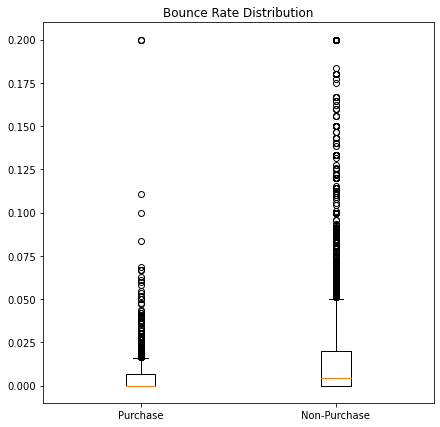

In [10]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

data = [df_buy['BounceRates'], df_no_buy['BounceRates']]
df_buy
ax.set_title("Bounce Rate Distribution")
ax.set_xticklabels(['Purchase', 'Non-Purchase'])
ax.boxplot(data)

In [11]:
data[0].mean()

0.005117152640461212

In [12]:
data[1].mean()

0.025317232197850356

Looking at exit rate distribution

<ipython-input-13-7849caf96774>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Purchase', 'Non-Purchase'])


{'whiskers': [<matplotlib.lines.Line2D at 0x13c85e1b220>,
 'caps': [<matplotlib.lines.Line2D at 0x13c85e1b880>,
 'boxes': [<matplotlib.lines.Line2D at 0x13c85e17e80>,
 'medians': [<matplotlib.lines.Line2D at 0x13c85e08ee0>,
 'fliers': [<matplotlib.lines.Line2D at 0x13c85e1bbe0>,
 'means': []}

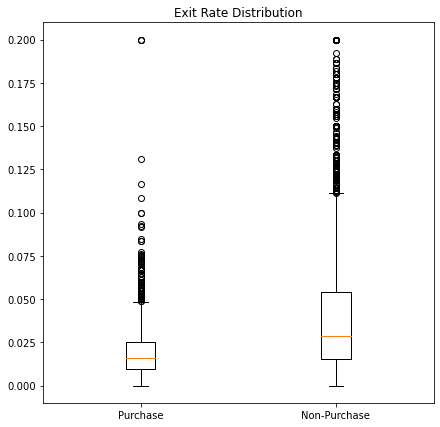

In [13]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

data = [df_buy['ExitRates'], df_no_buy['ExitRates']]
ax.set_title("Exit Rate Distribution")
ax.set_xticklabels(['Purchase', 'Non-Purchase'])
ax.boxplot(data)

In [14]:
data[0].mean()

0.019555168256813433

In [15]:
data[1].mean()

0.04737827052648154

Number of pages visited 

In [16]:
df['TotalPages'] = df["Administrative"] + df["Informational"] + df["ProductRelated"]
df_buy['TotalPages'] = df_buy["Administrative"] + df_buy["Informational"] + df_buy["ProductRelated"]
df_no_buy['TotalPages'] = df_no_buy["Administrative"] + df_no_buy["Informational"] + df_no_buy["ProductRelated"]

<ipython-input-16-48c1bd80535b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buy['TotalPages'] = df_buy["Administrative"] + df_buy["Informational"] + df_buy["ProductRelated"]
<ipython-input-16-48c1bd80535b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_buy['TotalPages'] = df_no_buy["Administrative"] + df_no_buy["Informational"] + df_no_buy["ProductRelated"]


In [17]:
print(df_buy['TotalPages'].mean())
print(df_no_buy['TotalPages'].mean())

52.38993710691824
31.284206486279025


People who purchase a product from the site visit an average of 20 (!) more pages.

<ipython-input-18-309c9354e67d>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Purchase', 'Non-Purchase'])


{'whiskers': [<matplotlib.lines.Line2D at 0x13c85e9fdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x13c85ea8e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x13c85ea8ac0>,
 'medians': [<matplotlib.lines.Line2D at 0x13c85eb2520>,
 'fliers': [<matplotlib.lines.Line2D at 0x13c85eb2880>,
 'means': []}

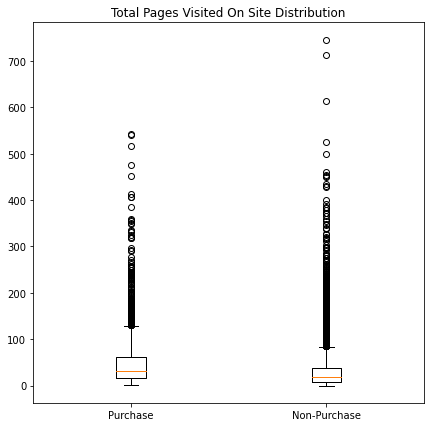

In [18]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

data = [df_buy['TotalPages'], df_no_buy['TotalPages']]
ax.set_xticklabels(['Purchase', 'Non-Purchase'])
ax.set_title("Total Pages Visited On Site Distribution")
ax.boxplot(data)

Seeing if month has anything to do with sales

In [19]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [20]:
df_buy['Month'].value_counts()

Nov     760
May     365
Dec     216
Mar     192
Oct     115
Sep      86
Aug      76
Jul      66
June     29
Feb       3
Name: Month, dtype: int64

In [21]:
df_no_buy['Month'].value_counts()

May     2999
Nov     2238
Mar     1715
Dec     1511
Oct      434
Jul      366
Sep      362
Aug      357
June     259
Feb      181
Name: Month, dtype: int64

In [22]:
100 * df_buy['Month'].value_counts() / df['Month'].value_counts()

Aug     17.551963
Dec     12.507238
Feb      1.630435
Jul     15.277778
June    10.069444
Mar     10.068170
May     10.850178
Nov     25.350233
Oct     20.947177
Sep     19.196429
Name: Month, dtype: float64

It seems that the holiday season (October, November, December) correlates to the percent of visits resulting in purchases 

Total time spent looking at pages

In [23]:
df['TotalTime'] = df["Administrative_Duration"] + df["Informational_Duration"] + df["ProductRelated_Duration"]

df_buy['TotalTime'] = df_buy["Administrative_Duration"] + df_buy["Informational_Duration"] + df_buy["ProductRelated_Duration"]
df_no_buy['TotalTime'] = df_no_buy["Administrative_Duration"] + df_no_buy["Informational_Duration"] + df_no_buy["ProductRelated_Duration"]

<ipython-input-23-10f6b3784309>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buy['TotalTime'] = df_buy["Administrative_Duration"] + df_buy["Informational_Duration"] + df_buy["ProductRelated_Duration"]
<ipython-input-23-10f6b3784309>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_buy['TotalTime'] = df_no_buy["Administrative_Duration"] + df_no_buy["Informational_Duration"] + df_no_buy["ProductRelated_Duration"]


In [24]:
print(df_buy['TotalTime'].mean())
print(df_no_buy['TotalTime'].mean())

2053.3042854341525
1173.9641575519258


Site visits that end in purchase are usually TWICE as long as visits that do not end in purchase.

<ipython-input-25-dffd7240bfbf>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Purchase', 'Non-Purchase'])


{'whiskers': [<matplotlib.lines.Line2D at 0x13c85f399d0>,
 'caps': [<matplotlib.lines.Line2D at 0x13c85f430d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13c85f39670>,
 'medians': [<matplotlib.lines.Line2D at 0x13c85f43790>,
 'fliers': [],
 'means': []}

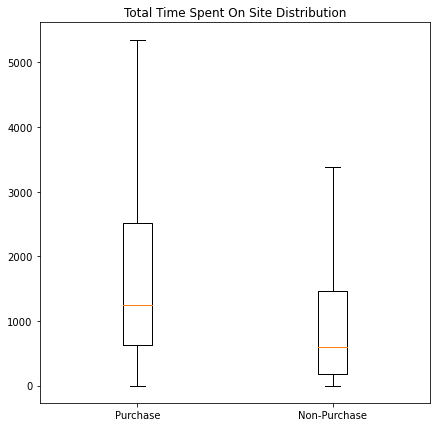

In [25]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

data = [df_buy['TotalTime'], df_no_buy['TotalTime']]
ax.set_xticklabels(['Purchase', 'Non-Purchase'])
ax.set_title("Total Time Spent On Site Distribution")
ax.boxplot(data, showfliers=False)

Finally, looking at what percentage of returning visitors and new visitors made a purchase

In [26]:
total_returning_visitors = df[df['VisitorType'] == 'Returning_Visitor']['VisitorType'].count()
total_new_visitors = df[df['VisitorType'] == 'New_Visitor']['VisitorType'].count()

print(total_returning_visitors)
print(total_new_visitors)

10551
1694


In [27]:
buying_returning_visitors = df_buy[df_buy['VisitorType'] == 'Returning_Visitor']['VisitorType'].count()
buying_new_visitors = df_buy[df_buy['VisitorType'] == 'New_Visitor']['VisitorType'].count()

print(buying_returning_visitors)
print(buying_new_visitors)

1470
422


In [28]:
percent_returning_visitors_buy = 100 * buying_returning_visitors / total_returning_visitors
percent_new_visitors_buy = 100 * buying_new_visitors / total_new_visitors

print(percent_returning_visitors_buy)
print(percent_new_visitors_buy)

13.93232868922377
24.911452184179456


It seems there is a correlation between:
-Bounce Rate
-Exit Rate
-Total Pages Visited
-Total Time Spent On Site
-Month Of Year
-Whether The Visitor Is New Or Returning

# Model Testing

I will be using 3 different models for this project: Decision Tree, ANN, and RNN

In [29]:
labels = pd.DataFrame()
enc = OneHotEncoder()
transformed = enc.fit_transform(df[["Revenue"]])
print(transformed.toarray())
print(enc.categories_[0])
#labels[enc.categories_[0]] = transformed.toarray()
#print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[False  True]


In [30]:
features = pd.DataFrame()
df['VisitorType'].replace(('Returning_Visitor', 'New_Visitor', 'Other'), (0,1,2), inplace=True)
df['Month'].replace(('Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), (0,1,2,3,4,5,6,7,8,9), inplace=True)
df['Revenue'].replace((False, True), (0,1), inplace=True)
features['TotalPages'] = df['TotalPages']
features['TotalTime'] = df['TotalTime']
features['BounceRates'] = df['BounceRates']
features['ExitRates'] = df['ExitRates']
features['VisitorType'] = df['VisitorType']
features['Month'] = df['Month']
#label = pd.DataFrame(transformed.toarray())
label = df['Revenue']

#print(features)
#print(label)

x_train, x_test_original, y_train, y_test_original = train_test_split(features, label, stratify=label)

In [ ]:
model = DecisionTreeClassifier(
    criterion="gini",
    splitter='best',
    random_state=0,
    )

model.fit(x_train, y_train)
plot_tree(model, filled=True)

[Text(199.69220520014633, 214.24235294117648, 'X[3] <= 0.029\ngini = 0.262\nsamples = 9247\nvalue = [7816, 1431]'),
 Text(104.52291203129437, 207.8470588235294, 'X[1] <= 679.382\ngini = 0.352\nsamples = 5170\nvalue = [3992, 1178]'),
 Text(30.66165950178068, 201.45176470588234, 'X[4] <= 0.5\ngini = 0.247\nsamples = 1777\nvalue = [1520, 257]'),
 Text(10.038813210959344, 195.0564705882353, 'X[3] <= 0.0\ngini = 0.197\nsamples = 1186\nvalue = [1055, 131]'),
 Text(1.3225278828764884, 188.66117647058823, 'X[5] <= 5.5\ngini = 0.488\nsamples = 19\nvalue = [11, 8]'),
 Text(0.7935167297258929, 182.26588235294116, 'X[1] <= 195.383\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.5290111531505953, 175.87058823529412, 'X[1] <= 127.533\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.26450557657529766, 169.47529411764705, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7935167297258929, 169.47529411764705, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(1.0580223063011907, 175.8705882

Error in callback <function flush_figures at 0x0000013C8218AB80> (for post_execute):


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ryana\anaconda3\lib\site-packages\IPython\core\events.py", line 89, in trigger
    func(*args, **kwargs)
  File "C:\Users\ryana\anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py", line 121, in flush_figures
    return show(True)
  File "C:\Users\ryana\anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py", line 41, in show
    display(
  File "C:\Users\ryana\anaconda3\lib\site-packages\IPython\core\display.py", line 313, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "C:\Users\ryana\anaconda3\lib\site-packages\IPython\core\formatters.py", line 180, in format
    data = formatter(obj)
  File "C:\Users\ryana\anaconda3\lib\site-packages\decorator.py", line 231, in fun
    return caller(func, *(extras + args), **kw)
  File "C:\Users\ryana\anaconda3\lib\site-packages\IPython\core\formatters.py", line 224, in catch_format_error
    r = method(self, *args, **kwargs)
  File "C:\U

In [34]:
print(model.score(x_test_original, y_test_original))

0.7739215050275705


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
model_random = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    random_state=0,
    min_samples_split=10
    )
model_random.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=10, random_state=0)

In [44]:
print(model_random.score(x_test_original, y_test_original))

y_pred = model_random.predict(x_test_original)
print(confusion_matrix(y_test_original.to_numpy(), y_pred))

0.8417126175802789
[[2551   55]
 [ 433   44]]


In [45]:
print(classification_report(y_test_original.to_numpy(), y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2606
           1       0.44      0.09      0.15       477

    accuracy                           0.84      3083
   macro avg       0.65      0.54      0.53      3083
weighted avg       0.79      0.84      0.80      3083



Even with 10,000 trees as part of the forest, the maximum accuracy is roughly 83%. Lets try a neural network now.

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix

In [47]:
#x_train = preprocessing.normalize(x_train)
#x_test = preprocessing.normalize(x_test)

model_neural = keras.Sequential([
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_neural.compile(optimizer="Adam", 
              loss='binary_crossentropy',
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.FalsePositives(), keras.metrics.FalseNegatives(), keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), tf.keras.metrics.BinaryAccuracy(
    name='binary_accuracy', dtype=None, threshold=0.2
)])

In [48]:
y_train.value_counts()

0    7816
1    1431
Name: Revenue, dtype: int64

In [49]:
y_train.shape

(9247,)

In [50]:
from tensorflow.keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='loss', 
                                   mode='max', 
                                   patience=10,
                                   restore_best_weights=True)

history = model_neural.fit(x_train, 
                    y_train,
                    callbacks=[stop],
                    epochs=20,
                    batch_size=1,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/20



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



7397/7397 [==============================] - 24s 3ms/step - loss: 1.3860 - accuracy: 0.8251 - recall: 0.0475 - false_positives: 211.0000 - false_negatives: 1083.0000 - true_positives: 54.0000 - true_negatives: 6049.0000 - binary_accuracy: 0.6896 - val_loss: 0.4259 - val_accuracy: 0.8411 - val_recall: 0.0000e+00 - val_false_positives: 0.0000e+00 - val_false_negatives: 294.0000 - val_true_positives: 0.0000e+00 - val_true_negatives: 1556.0000 - val_binary_accuracy: 0.8411
Epoch 2/20
7397/7397 [==============================] - 22s 3ms/step - loss: 0.4816 - accuracy: 0.8453 - recall: 0.0053 - false_positives: 13.0000 - false_negatives: 1131.0000 - true_positives: 6.0000 - true_negatives: 6247.0000 - binary_accuracy: 0.7648 - val_loss: 0.4241 - val_accuracy: 0.8411 - val_recall: 0.0000e+00 - val_false_positives: 0.0000e+00 - val_false_negatives: 294.0000 - val_true_positives: 0.0000e+00 - val_true_negatives: 1556.0000 - val_binary_accuracy: 0.8411
Epoch 3/20
7397/7397 [=====================

In [53]:
model_neural.evaluate(x_test_original, y_test_original)
print(y_train.value_counts())
print(y_test_original.value_counts())

97/97 [==============================] - 0s 3ms/step - loss: 0.4185 - accuracy: 0.8453 - recall: 0.0000e+00 - false_positives: 0.0000e+00 - false_negatives: 477.0000 - true_positives: 0.0000e+00 - true_negatives: 2606.0000 - binary_accuracy: 0.8450
0    7816
1    1431
Name: Revenue, dtype: int64
0    2606
1     477
Name: Revenue, dtype: int64


In [55]:
y_pred = model_neural.predict(x_test_original)

print(y_test_original[0:30])
print(y_pred[0:30])

10177    1
3008     0
3438     0
1827     0
4921     0
9802     1
6907     0
4882     0
859      0
7617     1
10940    0
367      0
1117     0
5299     0
9095     0
3320     1
8588     0
3500     0
7163     0
7459     0
8808     0
9409     0
7193     0
8800     1
10305    0
1017     0
8761     0
1516     1
10093    0
3528     0
Name: Revenue, dtype: int64
[[1.9421574e-01]
 [1.9421574e-01]
 [3.6536753e-03]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [2.2906065e-04]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.9421574e-01]
 [1.3428926e-04]
 [1.9421574e-01]]


The model is only classifying data as a non-purchase, which is obviously not the case

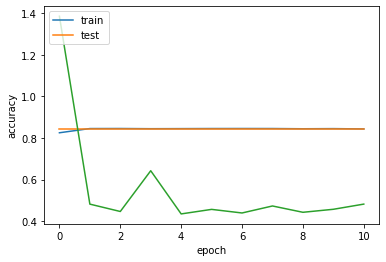

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Now to implement imblearn and conduct the same experiment on the over sampled data.

In [57]:
from imblearn.over_sampling import RandomOverSampler

In [58]:
ros = RandomOverSampler(random_state=0)

In [59]:
x = features
y = label

features_resampled, label_resampled = ros.fit_resample(x, y)

In [60]:
label_resampled.value_counts()

0    10422
1    10422
Name: Revenue, dtype: int64

[Text(219.11996639766792, 214.42, 'X[3] <= 0.04\ngini = 0.5\nsamples = 15633\nvalue = [7817, 7816]'),
 Text(130.73711325835345, 208.38, 'X[1] <= 679.382\ngini = 0.482\nsamples = 12108\nvalue = [4921, 7187]'),
 Text(43.219634959833854, 202.34, 'X[5] <= 2.5\ngini = 0.496\nsamples = 3663\nvalue = [1989, 1674]'),
 Text(12.923486126338872, 196.3, 'X[1] <= 283.75\ngini = 0.448\nsamples = 1458\nvalue = [963, 495]'),
 Text(1.5812431475078013, 190.26, 'X[0] <= 7.5\ngini = 0.227\nsamples = 467\nvalue = [406, 61]'),
 Text(1.355351269292401, 184.22, 'gini = 0.0\nsamples = 155\nvalue = [155, 0]'),
 Text(1.8071350257232015, 184.22, 'X[0] <= 9.5\ngini = 0.315\nsamples = 312\nvalue = [251, 61]'),
 Text(0.9035675128616008, 178.18, 'X[5] <= 1.5\ngini = 0.469\nsamples = 133\nvalue = [83, 50]'),
 Text(0.4517837564308004, 172.14, 'X[1] <= 212.167\ngini = 0.133\nsamples = 42\nvalue = [39, 3]'),
 Text(0.2258918782154002, 166.1, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.6776756346462005, 166.1, 'X

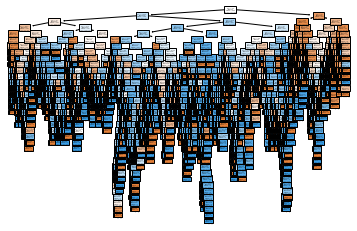

In [61]:
x_train, x_test, y_train, y_test = train_test_split(features_resampled, label_resampled, stratify=label_resampled)

model = DecisionTreeClassifier(
    criterion="gini",
    splitter='best',
    random_state=0,
    )

model.fit(x_train, y_train)
plot_tree(model, filled=True)

In [62]:
print(model.score(x_test, y_test))

0.9084628670120898


In [63]:
y_pred = model.predict(x_test)
print(classification_report(y_test.to_numpy(), y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      2605
           1       0.85      0.99      0.92      2606

    accuracy                           0.91      5211
   macro avg       0.92      0.91      0.91      5211
weighted avg       0.92      0.91      0.91      5211



In [64]:
model_random = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    random_state=1,
    min_samples_split=2
    )
model_random.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [65]:
print(model_random.score(x_test, y_test))

y_pred = model_random.predict(x_test)
print(confusion_matrix(y_test.to_numpy(), y_pred))

0.9368643254653617
[[2300  305]
 [  24 2582]]


In [66]:
print(classification_report(y_test.to_numpy(), y_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2605
           1       0.89      0.99      0.94      2606

    accuracy                           0.94      5211
   macro avg       0.94      0.94      0.94      5211
weighted avg       0.94      0.94      0.94      5211



Now with min_samples_split=10

In [67]:
model_random_2 = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    random_state=0,
    min_samples_split=10
    )
model_random_2.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=10, random_state=0)

In [68]:
print(model_random_2.score(x_test, y_test))

y_pred = model_random_2.predict(x_test)
print(confusion_matrix(y_test.to_numpy(), y_pred))

print(classification_report(y_test.to_numpy(), y_pred))

0.9092304739973134
[[2221  384]
 [  89 2517]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2605
           1       0.87      0.97      0.91      2606

    accuracy                           0.91      5211
   macro avg       0.91      0.91      0.91      5211
weighted avg       0.91      0.91      0.91      5211



In [69]:
#x_train = preprocessing.normalize(x_train)
#x_test = preprocessing.normalize(x_test)

model_neural = keras.Sequential([
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_neural.compile(optimizer="Adam", 
              loss='binary_crossentropy',
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.FalsePositives(), keras.metrics.FalseNegatives(), keras.metrics.TruePositives(), keras.metrics.TrueNegatives()])

In [70]:
from tensorflow.keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='loss', 
                                   mode='max', 
                                   patience=10,
                                   restore_best_weights=True)

history = model_neural.fit(x_train, 
                    y_train,
                    callbacks=[stop],
                    epochs=20,
                    batch_size=1,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/20
12506/12506 [==============================] - 39s 3ms/step - loss: 1.4122 - accuracy: 0.5543 - recall_1: 0.7788 - false_positives_1: 4186.0000 - false_negatives_1: 1388.0000 - true_positives_1: 4887.0000 - true_negatives_1: 2045.0000 - val_loss: 0.6733 - val_accuracy: 0.5350 - val_recall_1: 0.9916 - val_false_positives_1: 1441.0000 - val_false_negatives_1: 13.0000 - val_true_positives_1: 1528.0000 - val_true_negatives_1: 145.0000
Epoch 2/20
12506/12506 [==============================] - 36s 3ms/step - loss: 0.6854 - accuracy: 0.5563 - recall_1: 0.9422 - false_positives_1: 5186.0000 - false_negatives_1: 363.0000 - true_positives_1: 5912.0000 - true_negatives_1: 1045.0000 - val_loss: 0.6702 - val_accuracy: 0.5350 - val_recall_1: 0.9935 - val_false_positives_1: 1444.0000 - val_false_negatives_1: 10.0000 - val_true_positives_1: 1531.0000 - val_true_negatives_1: 142.0000
Epoch 3/20
12506/12506 [==============================] - 36s 3ms/step - loss: 0.6775 - accuracy: 0.5613 - re

In [71]:
model_neural.evaluate(x_test, y_test)
print(y_train.value_counts())
print(y_test.value_counts())

163/163 [==============================] - 1s 3ms/step - loss: 0.6708 - accuracy: 0.5435 - recall_1: 0.9896 - false_positives_1: 2352.0000 - false_negatives_1: 27.0000 - true_positives_1: 2579.0000 - true_negatives_1: 253.0000
0    7817
1    7816
Name: Revenue, dtype: int64
1    2606
0    2605
Name: Revenue, dtype: int64


Just to check, I used the original test data (the test data before oversampling) to make predictions. These are the results.

*NOTE: This section was made several months ago. I am well aware that this is an instance of data leakage, as the model was trained with these data in addition to the over sampled data. I will have to think about how to address this issue in the future.*

In [72]:
print(model.score(x_test_original, y_test_original))
y_pred = model.predict(x_test_original)
print(classification_report(y_test_original.to_numpy(), y_pred))

0.9620499513460915
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2606
           1       0.81      1.00      0.89       477

    accuracy                           0.96      3083
   macro avg       0.90      0.98      0.93      3083
weighted avg       0.97      0.96      0.96      3083



In [73]:
print(model_random.score(x_test_original, y_test_original))

y_pred = model_random.predict(x_test_original)
print(confusion_matrix(y_test_original.to_numpy(), y_pred))

0.9750243269542653
[[2531   75]
 [   2  475]]


In [74]:
print(classification_report(y_test_original.to_numpy(), y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2606
           1       0.86      1.00      0.93       477

    accuracy                           0.98      3083
   macro avg       0.93      0.98      0.96      3083
weighted avg       0.98      0.98      0.98      3083

